<a href="https://colab.research.google.com/github/hardikdhamija96/AeroFit/blob/main/Aerofitcasestudy_HardikDhamija_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🟦 Business Case - Aerofit - Descriptive Statistics & Probability

<div align="center">
  <img src="https://raw.githubusercontent.com/hardikdhamija96/AeroFit/refs/heads/main/mainLogoFinal.png" width="520">
</div>

### 🔹 About Aerofit

- **Leading Fitness Brand**: Aerofit is a well-known brand in the fitness equipment industry.
- **Wide Product Range**:
  - Treadmills
  - Exercise bikes
  - Gym equipment
  - Fitness accessories
- **Caters to Everyone**: Designed to meet the fitness needs of people from all categories and fitness levels.

## 🔷 Business Problem

- We are working with customer purchase data from **Aerofit**.
- As data analysts supporting the **marketing and product strategy team**, our goal is to:
  - Understand **which types of customers** prefer **which treadmill models**.
- This analysis will help Aerofit:
  - Recommend the **right products** to new customers
  - Personalize outreach based on customer characteristics like:
    - `Age`
    - `Income`
    - `Gender`
    - `Fitness level` ,etc.


### 🔹 Objectives

- Perform **descriptive analytics** to create detailed **customer profiles** for each treadmill product.
- Understand how **customer characteristics** (like gender, age group, income, fitness level, etc.) vary across different treadmill types.
- Use **tables and charts** to visualize and summarize key patterns in customer behavior.

### 🔹 Our Approach

We'll explore customer behavior using a combination of:
- Descriptive statistics and visual analysis
- Probability-based profiling using conditional distributions
- Group-wise insights to build customer profiles for each product


### 🔹Product Portifolio

<div align="center">
  <img src="https://raw.githubusercontent.com/hardikdhamija96/AeroFit/refs/heads/main/Portfolio.png" width="400">
</div>

## 🔷 Initial Hypotheses

- **Income vs Product Choice**: Customers with higher income are more likely to buy the premium KP781 treadmill.
- **Age Factor**: Younger customers may prefer the entry-level KP281, while older users may go for KP481 or KP781.
- **Gender Preference**: Males might show a higher preference for advanced models like KP781.
- **Usage Frequency**: Regular or daily users may invest in more durable, feature-rich models.
- **Marital Status**: Married individuals may lean towards mid-range products like KP481 for shared use at home.



## 🔷 1. Load and Understand the Data

In [1]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Linking Google Drive for file access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing and loading file
file_path = '/content/drive/MyDrive/AeroFit Project/aerofit_treadmill.xlsx'

import pandas as pd
df = pd.read_excel(file_path)
print("Dataset Loaded Successfully. Shape:", df.shape)

Dataset Loaded Successfully. Shape: (180, 9)


In [4]:
# quick look over data
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


In [5]:
# columns we have
df.columns.tolist()

['Product',
 'Age',
 'Gender',
 'Education',
 'MaritalStatus',
 'Usage',
 'Fitness',
 'Income',
 'Miles']

#### 🔹 Column Observations

- `Product` : Treadmill model purchased (KP281, KP481, or KP781)
- `Age` : Age of the customer (in years)
- `Gender` : Gender of the customer (Male/Female)
- `Education` : Years of formal education completed by the customer
- `MaritalStatus` : Marital status of the customer (Single/Married)
- `Usage` : How frequently the treadmill is used (days per week)
- `Fitness` : Self-reported fitness level (scale of 1 to 5, where 5 = very fit)
- `Income` : Annual income of the customer (in USD)
- `Miles` : Average miles walked/ran on the treadmill per week


In [6]:
# checking type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### 🔹 `df.info()` Observations:

#### 🔹 Feature Types
- The following columns are of `object` type:
  - `Product`, `Gender`, and `MaritalStatus`
  - These can be converted to `category` type to optimize memory usage and improve performance during analysis.

- The remaining 6 features are **numerical**:
  - `Age`, `Education`, `Usage`, `Fitness`, `Income`, and `Miles`
  - These can be used as-is for analysis, and later **grouped into bins** (e.g., income group, usage frequency) to derive **segment-based insights**.



#### 🔹Numerical Features Overview



In [7]:
# non graphical overview of numerical data
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


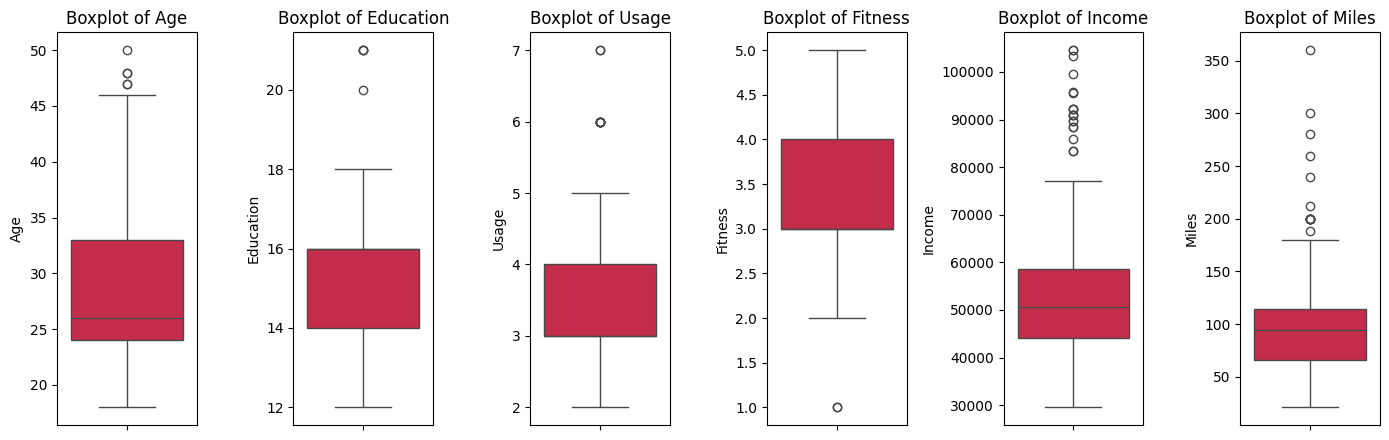

In [72]:
# graphical overview of numerical data
num_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']


plt.figure(figsize=(14, 4.5))

for i, col in enumerate(num_cols):
  plt.subplot(1,6,i+1)
  sns.boxplot(y=df[col], color='crimson')
  plt.title('Boxplot of '+ col)

plt.tight_layout()
plt.show()

### 🔹 Observations: Numerical Features (from `describe()` + Boxplots)

- **Age**:
  - Most customers are young adults (median: 26 years).
  - Mild right skew with a few outliers beyond 45 years.
  
- **Education**:
  - Median education level is 16 years, suggesting college graduates.
  - Slight spread, with a few outliers at 20–21 years (possibly postgraduates).

- **Usage (per week)**:
  - Most users plan to use the treadmill 3–4 times/week.
  - Max is 7, with light right skew and a couple of high-usage outliers.

- **Fitness (self-rated 1–5)**:
  - Median fitness level is 3.
  - Values are spread across all levels, with one low-end outlier at 1.

- **Income (annual in USD)**:
  - Median income is around `$50,596`, but distribution is right-skewed.
  - Several high-income outliers above `$75,000–$100,000`.

- **Miles (per week)**:
  - Customers expect to walk/run ~94 miles median per week.
  - A few high-end users reporting over 200+ miles — clear outliers present.

⚠️These observations support the need for `outlier handling` (especially in `Income` and `Miles`) and guide how we interpret user behavior based on frequency, fitness, and affordability.


#### 🔹Object Featuers Overview
- Three features all should be converted to category type
  - We will do that in `Data Preprocessing`

In [9]:
df.describe(include=[object])

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


#### 🔹 Observations:
- The most frequently purchased product is **KP281**, selected by 80 out of 180 customers.
- **Male** customers form the majority.
- A significant portion of customers are **partnered**.

In [10]:
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


### 🔹Observation on Unique Values

- `Product`, `Gender`, and `MaritalStatus` are low-cardinality categorical features.
- `Usage`, `Fitness`, and `Education` have moderate distinct values — good for grouped analysis.
- `Age`, `Income`, and `Miles` are continuous with many unique values
  - ℹ️ already noted for possible binning or outlier treatment.


In [11]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [12]:
df.duplicated().sum()

np.int64(0)

### ✅ Missing Values Check

No missing values were found in the dataset across any of the columns.  


## 🔷 2. Data PreProcessing

In [13]:
# Checking What we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### 🔹2.1. Changing Data Type

- Columns like `Product`, `Gender`, and `MaritalStatus` are categorical by nature.
- We are converting them to `category` type.
- This improves performance and makes group-based analysis faster and cleaner

In [14]:
# changing data types to category
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [15]:
# Confirming updated types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


### 🔹2.2 Feature Extraction

- We are creating new relevant columns to get more meaningful group-wise insights.
- Features like `Income`, `Age`, `Miles`, and `Education` are continuous, so we are converting them into **grouped categories**.
- This helps us analyze patterns across customer segments more effectively.


#### 2.2.1 🔹IncomeGroup Column

- We are segmenting customers based on their income.
- This will help us analyze if product preferences vary across different income levels.
- Grouping income makes it easier to interpret trends compared to using raw values.

In [18]:
# checking income range
df['Income'].describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


In [46]:
# Get percentiles
q25 = df['Income'].quantile(0.25)
q75 = df['Income'].quantile(0.75)
print(q25,q75)

44058.75 58668.0


In [47]:
# Function to label
def income_level(x):
    if x < q25:
        return 'Low Income'
    elif x > q75:
        return 'High Income'
    else:
        return 'Mid Income'

df['IncomeGroup'] = df['Income'].apply(income_level)

In [48]:
df['IncomeGroup'] = df['IncomeGroup'].astype('category')

In [49]:
df['IncomeGroup'].value_counts(normalize=True).round(2)

,proportion
IncomeGroup,
Mid Income,0.50
High Income,0.25
Low Income,0.25


#### 🔹 Income Grouping Strategy

- To understand customer behavior based on income, we grouped the `Income` column into 3 segments:
  - `Low Income`: Less than `$44,058`
  - `Mid Income`: Between `$44,058` and `$58,668`
  - `High Income`: More than `$58,668`
- These cutoffs are based on the 25th and 75th percentiles of the actual income data.
- Grouping income this way helps us compare product preferences across different earning levels more easily.




#### 2.2.2 🔹MilesGroup Column

- We are grouping the `Miles` column to understand how expected treadmill usage varies across customers.
- This helps us analyze whether people who plan to use the treadmill more prefer specific products.
- Grouping also makes it easier to compare trends instead of looking at raw mile values.


In [21]:
df['Miles'].describe()

,Miles
count,180.000000
mean,103.194444
std,51.863605
min,21.000000
25%,66.000000
50%,94.000000
75%,114.750000
max,360.000000


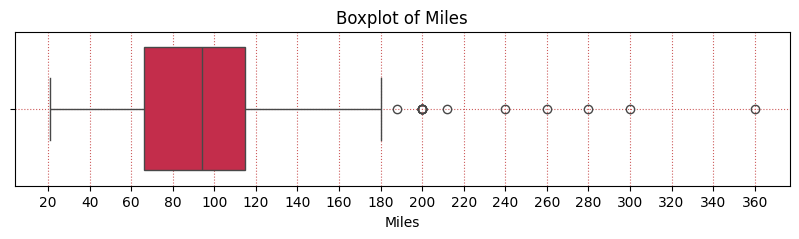

In [70]:
plt.figure(figsize=(10, 2))
sns.boxplot(x = df['Miles'],color='crimson')
plt.xticks(np.arange(20,380,20))
plt.grid(color="indianred", ls=":")
plt.title('Boxplot of Miles')
plt.show()

In [23]:
min_miles = df['Miles'].min()
max_miles = df['Miles'].max()
median_miles = df['Miles'].median()
miles_25percentile = df['Miles'].quantile(0.25)
miles_75percentile = df['Miles'].quantile(0.75)

print(f"Minimum Miles: {min_miles}")
print(f"Maximum Miles: {max_miles}")
print(f"Median Miles: {median_miles}")
print(f"25th Percentile Miles: {miles_25percentile}")
print(f"75th Percentile Miles: {miles_75percentile}")

Minimum Miles: 21
Maximum Miles: 360
Median Miles: 94.0
25th Percentile Miles: 66.0
75th Percentile Miles: 114.75


In [50]:
def miles_level(x):
    if x < miles_25percentile:
        return 'Less Active'
    elif (x >= miles_25percentile) and (x <= miles_75percentile):
        return 'Moderately Active'
    elif (x > miles_75percentile) and (x <= 180):
        return 'Very Active'
    else:
        return 'Ultra Active'

df['MilesGroup'] = df['Miles'].apply(miles_level)


In [51]:
df['MilesGroup'] = df['MilesGroup'].astype('category')

In [52]:
df['MilesGroup'].value_counts()

,count
MilesGroup,
Moderately Active,99
Less Active,36
Very Active,32
Ultra Active,13


#### 🔹 Miles Grouping Strategy

- We grouped the `Miles` column into 4 categories based on how much customers plan to walk/run each week:
  - `Less Active`: Less than `66` miles
  - `Moderately Active`: Between `66` and `114.75` miles
  - `Very Active`: Between `114.75` and `180` miles
  - `Ultra Active`: More than `180` miles per week
- This helps us compare product choices based on expected treadmill usage.



#### 2.2.3 🔹 EducationGroup Column

- We are grouping the `Education` column into broader levels to analyze whether education background impacts treadmill preference.
- This helps simplify the data and makes trend comparisons across different qualification levels easier.


In [27]:
df['Education'].describe()

,Education
count,180.000000
mean,15.572222
std,1.617055
min,12.000000
25%,14.000000
50%,16.000000
75%,16.000000
max,21.000000


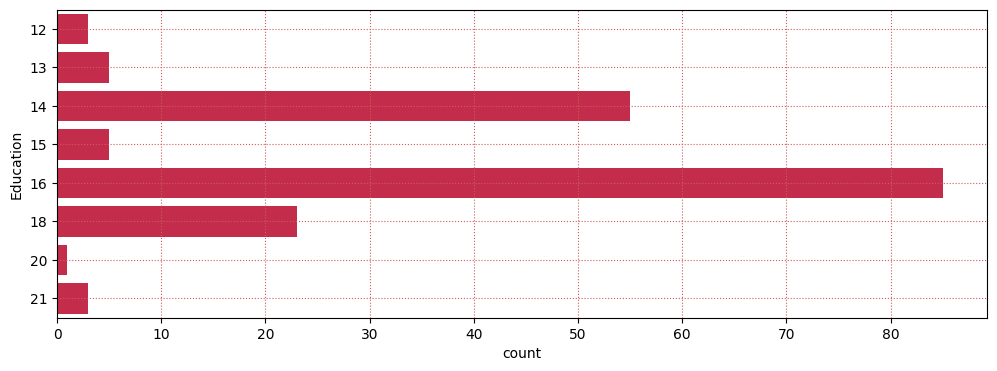

In [71]:
plt.figure(figsize=(12, 4))
sns.countplot(y=df['Education'],color='crimson')
plt.grid(color="indianred", ls=":")

In [29]:
def education_level(x):
    if x <= 12:
        return 'School'
    elif x <= 16:
        return 'Graduate'
    else:
        return 'Postgraduate'

df['EducationGroup'] = df['Education'].apply(education_level)


In [30]:
df['EducationGroup'] = df['EducationGroup'].astype('category')

In [31]:
df['EducationGroup'].value_counts()

,count
EducationGroup,
Graduate,150
Postgraduate,27
School,3


#### 🔹 Education Grouping Strategy

- We grouped the `Education` column based on total years of education into 3 levels:
  - `School`: 12 years or less
  - `Graduate`: 13 to 16 years
  - `Postgraduate`: More than 16 years
- These categories match common academic stages and make it easier to analyze trends across education levels.



#### 🔹2.2.4 AgeGroup Column

- We are grouping the `Age` column to explore how treadmill preferences vary across different age ranges.
- Grouping helps us identify trends and behaviors across younger, middle-aged, and older customer segments.


In [32]:
df['Age'].describe()

,Age
count,180.000000
mean,28.788889
std,6.943498
min,18.000000
25%,24.000000
50%,26.000000
75%,33.000000
max,50.000000


- 4 groups can be made for `Age` column to create new column `AgeGroup`
  - `18-24`
  - `25-33`
  - `34-40`
  - `40-50`

In [33]:
# creating Age group with 4 groups
bins = [18,25,34,40,51]
labels = ['18-24', '25-33', '34-40', '40-50']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [34]:
df['AgeGroup'].value_counts()

,count
AgeGroup,
25-33,84
18-24,54
34-40,25
40-50,17


In [35]:
# confirming correctly done
df['AgeGroup'].describe()

,AgeGroup
count,180
unique,4
top,25-33
freq,84


#### 🔹 Age Grouping Strategy

- We grouped the `Age` column into 4 clear segments to help compare customer behavior across different age ranges:
  - `18–24`
  - `25–33`
  - `34–40`
  - `40–50`
- This allows us to identify trends in product preference across younger and older customer segments more easily.


#### 2.2.5 🔹 Price Column

- We created a `Price` column by mapping the actual selling price of each treadmill model.
- This allows us to build value-related metrics and compare financial impact across different customer segments.




In [16]:
# Creating Price Column

# Price mapping in USD
price_map = {
    'KP281': 1500,
    'KP481': 1750,
    'KP781': 2500
}

# Add new column
df['Price'] = df['Product'].map(price_map)


In [53]:
# setting its data type to int
df['Price'] = df['Price'].astype('int')

### 2.2.6 🔹 AspirationalSpend Column

- This column measures how much of a customer's income is being spent on a treadmill.
- It is calculated as `Price / Income`.
- A higher value indicates a more aspirational or stretch purchase.
- This helps us understand which customer groups are pushing their budgets to buy certain products.


In [54]:
df['AspirationalSpend'] = round(df['Price'] / df['Income'], 3)

In [56]:
df['AspirationalSpend'].head()

,AspirationalSpend
0,0.051
1,0.047
2,0.049
3,0.045
4,0.043


### 2.2.7 🔹 PricePerMile Column

- This column shows how much a customer is paying per mile of expected usage on the treadmill.
- It is calculated as `Price / Miles`.
- A lower value suggests higher value-for-money, while a higher value could indicate lower expected usage for the cost.
- Useful for profiling value-conscious vs. premium experience-driven customers.


In [57]:
df['PricePerMile'] = round(df['Price'] / df['Miles'], 2)

In [58]:
df['PricePerMile'].head()

,PricePerMile
0,13.39
1,20.00
2,22.73
3,17.65
4,31.91


`Income` and `Miles` have very varied range of data, required outlier handling

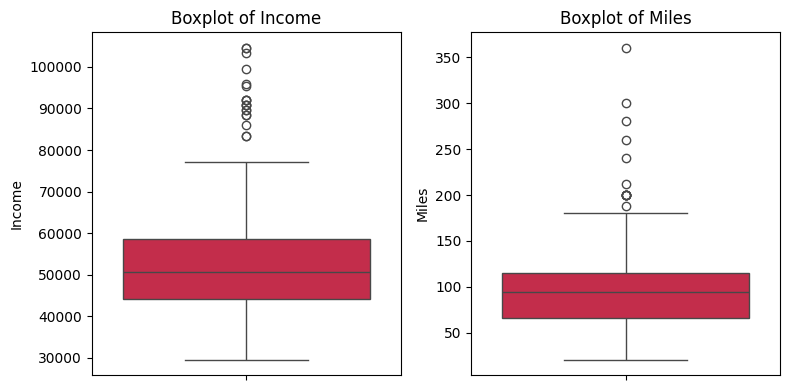

In [66]:
plt.figure(figsize=(8, 4))

plt.subplot(1,2,1)
sns.boxplot(y=df['Income'], color='crimson')
plt.title('Boxplot of Income')

plt.subplot(1,2,2)
sns.boxplot(y=df['Miles'],color='crimson')
plt.title('Boxplot of Miles')

plt.tight_layout()
plt.show()

### 🔹3. Outlier Handling (Capping at 95th Percentile)

- `Income` and `Miles` columns had some very high values in the boxplots.
- These values are not incorrect but can:
  - Skew summary stats like mean and standard deviation
  - Stretch the range of plots, making patterns harder to see
  - Unfairly affect comparisons across customer groups

- So, we applied **capping at the 95th percentile**:
  - Values above the 95th percentile were replaced with the 95th percentile value
  - No data was removed; just extreme impact was reduced

- This helps:
  - Maintain the full dataset
  - Focus on typical customer behavior
  - Get clearer, more balanced analysis


In [38]:
print(f"Income Cap: {round(df['Income'].quantile(0.95))}")
print(f"Miles Cap: {df['Miles'].quantile(0.95)}")

Income Cap: 90948
Miles Cap: 200.0


In [39]:
cap_income = round(df['Income'].quantile(0.95))
cap_miles = df['Miles'].quantile(0.95)

df['Income_Cap'] = np.where(df['Income']>cap_income, int(cap_income), df['Income'])
df['Miles_Cap'] = np.where(df['Miles']>cap_miles, int(cap_miles), df['Miles'])


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Product         180 non-null    category
 1   Age             180 non-null    int64   
 2   Gender          180 non-null    category
 3   Education       180 non-null    int64   
 4   MaritalStatus   180 non-null    category
 5   Usage           180 non-null    int64   
 6   Fitness         180 non-null    int64   
 7   Income          180 non-null    int64   
 8   Miles           180 non-null    int64   
 9   Price           180 non-null    int64   
 10  IncomeGroup     180 non-null    category
 11  MilesGroup      180 non-null    category
 12  EducationGroup  180 non-null    category
 13  AgeGroup        180 non-null    category
 14  Income_Cap      180 non-null    int64   
 15  Miles_Cap       180 non-null    int64   
dtypes: category(7), int64(9)
memory usage: 15.0 KB


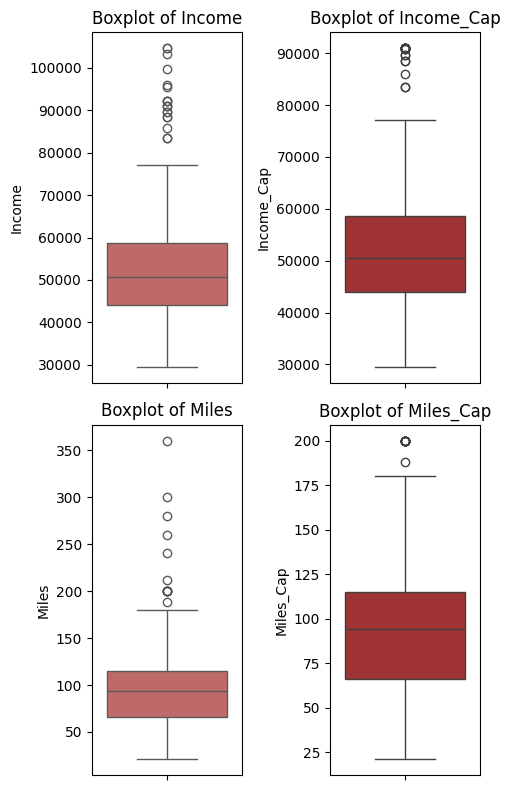

In [65]:
num_cols = ['Income', 'Income_Cap', 'Miles', 'Miles_Cap']
red_tones = ['indianred', 'firebrick', 'crimson', 'darkred']

plt.figure(figsize=(5, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2,2, i+1)
    sns.boxplot(y=df[col], color=red_tones[i%2])
    plt.title('Boxplot of '+ col)

plt.tight_layout()
plt.show()

### 🔹 Data Preprocessing Summary

- ✅ No missing values were found in the dataset.
  - Data was already clean and complete.
  
- ✅ Data types were optimized:
  - `Gender`, `MaritalStatus`, and `Product` were converted to `category` type for better performance and group-based analysis.

- ✅ Outliers were handled using capping (Winsorization):
  - `Income` and `Miles` had very high values.
  - Capped at the 95th percentile to reduce their influence on visualizations and summary stats.
  - No records were removed.

- ✅ Continuous features were grouped for better segmentation:
  - `Income` → `IncomeGroup`
  - `Miles` → `MilesGroup`
  - `Age` → `AgeGroup`
  - `Education` → `EducationGroup`
  - These groups support easier interpretation and customer-level profiling.

- ✅ New business-relevant columns were created:
  - `Price`: Mapped based on treadmill model
  - `AspirationalSpend`: Price as a fraction of income (spending strain)
  - `PricePerMile`: Value per expected usage

- ✅ The dataset is now analysis-ready:
  - Structured for both descriptive and probabilistic insights in the next sections.



In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Product         180 non-null    category
 1   Age             180 non-null    int64   
 2   Gender          180 non-null    category
 3   Education       180 non-null    int64   
 4   MaritalStatus   180 non-null    category
 5   Usage           180 non-null    int64   
 6   Fitness         180 non-null    int64   
 7   Income          180 non-null    int64   
 8   Miles           180 non-null    int64   
 9   Price           180 non-null    int64   
 10  IncomeGroup     180 non-null    category
 11  MilesGroup      180 non-null    category
 12  EducationGroup  180 non-null    category
 13  AgeGroup        180 non-null    category
 14  Income_Cap      180 non-null    int64   
 15  Miles_Cap       180 non-null    int64   
dtypes: category(7), int64(9)
memory usage: 15.0 KB


## 🔷 Non Graphical Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Product         180 non-null    category
 1   Age             180 non-null    int64   
 2   Gender          180 non-null    category
 3   Education       180 non-null    int64   
 4   MaritalStatus   180 non-null    category
 5   Usage           180 non-null    int64   
 6   Fitness         180 non-null    int64   
 7   Income          180 non-null    int64   
 8   Miles           180 non-null    int64   
 9   Price           180 non-null    int64   
 10  IncomeGroup     180 non-null    category
 11  MilesGroup      180 non-null    category
 12  EducationGroup  180 non-null    category
 13  AgeGroup        180 non-null    category
 14  Income_Cap      180 non-null    int64   
 15  Miles_Cap       180 non-null    int64   
dtypes: category(7), int64(9)
memory usage: 15.0 KB


In [ ]:
product = df['Product']
product = product.value_counts()
product = product.reset_index()
product.columns = ['Product', 'Count']
product

,Product,Count
0,KP281,80
1,KP481,60
2,KP781,40


In [ ]:
# Step 2: Add price
price_map = {
    'KP281': 1500,
    'KP481': 1750,
    'KP781': 2500
}
product['Price'] = product['Product'].map(price_map)


In [ ]:
product['Percent'] = round((product['Count'] / product['Count'].sum()) * 100,2)

# View final table
product

,Product,Count,Price,Percent
0,KP281,80,1500,44.44
1,KP481,60,1750,33.33
2,KP781,40,2500,22.22


#### Cheapest one have most sale and expensive one have the least

In [ ]:
ct = pd.crosstab(df['Gender'], df['Product'], normalize='index', margins=True) * 100
ct = ct.round(2)  # Round percentages
ct

Product,KP281,KP481,KP781
Gender,,,
Female,52.63,38.16,9.21
Male,38.46,29.81,31.73
All,44.44,33.33,22.22


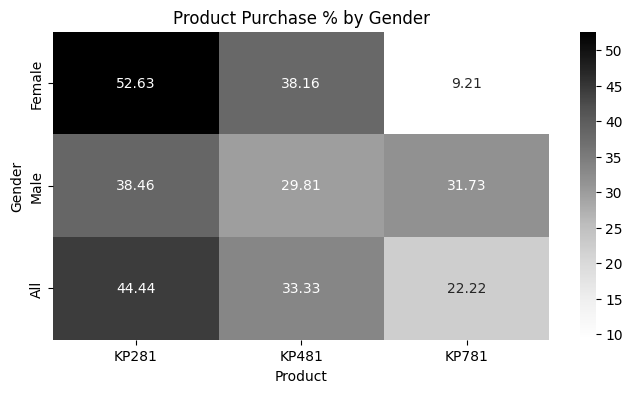

In [ ]:
# Plot heatmap
plt.figure(figsize=(8,4))
sns.heatmap(ct, annot=True, cmap='Greys', fmt=".2f")
plt.title("Product Purchase % by Gender")
plt.ylabel("Gender")
plt.xlabel("Product")
plt.show()

In [ ]:
pd.crosstab(df['Gender'], df['Product'],normalize='index',margins=True)*100 # Percentage of product by each gender

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769
All,44.444444,33.333333,22.222222


#### Female prefer more KP281; beside KP781 is highly preferred by male

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Price', 'IncomeGroup', 'MilesGroup',
       'EducationGroup', 'AgeGroup', 'Income_Cap', 'Miles_Cap'],
      dtype='object')

In [ ]:
pd.crosstab(df['MaritalStatus'], df['Product'],normalize='index')*100

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,44.859813,33.644860,21.495327
Single,43.835616,32.876712,23.287671


In [ ]:
pd.crosstab(df['IncomeGroup'], df['Product'],normalize='index')*100

Product,KP281,KP481,KP781
IncomeGroup,,,
High,15.555556,20.000000,64.444444
Low,66.666667,33.333333,0.000000
Mid,47.777778,40.000000,12.222222


In [ ]:
pd.crosstab(df['AgeGroup'], df['Product'],normalize='index')*100

Product,KP281,KP481,KP781
AgeGroup,,,
18-24,50.000000,31.481481,18.518519
25-33,40.476190,33.333333,26.190476
34-40,48.000000,40.000000,12.000000
40-50,41.176471,29.411765,29.411765


In [ ]:
pd.crosstab(df['IncomeGroup'], df['Product'],normalize='index')*100

Product,KP281,KP481,KP781
IncomeGroup,,,
High,15.555556,20.000000,64.444444
Low,66.666667,33.333333,0.000000
Mid,47.777778,40.000000,12.222222


In [ ]:
pd.crosstab(df['EducationGroup'], df['Product'],normalize='index')*100

Product,KP281,KP481,KP781
EducationGroup,,,
Graduate,50.666667,38.000000,11.333333
Postgraduate,7.407407,7.407407,85.185185
School,66.666667,33.333333,0.000000


In [ ]:
pd.crosstab(df['MilesGroup'], df['Product'],normalize='index')*100

Product,KP281,KP481,KP781
MilesGroup,,,
High,15.625000,21.875000,62.500000
Low,50.000000,50.000000,0.000000
Median,56.565657,34.343434,9.090909
Very High,7.692308,7.692308,84.615385


In [ ]:
(round(df.groupby(['Gender', 'Product'])['Income'].mean())).unstack()


<ipython-input-137-c13932c95ad4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (round(df.groupby(['Gender', 'Product'])['Income'].mean())).unstack()


Product,KP281,KP481,KP781
Gender,,,
Female,46020.0,49336.0,73634.0
Male,46816.0,48634.0,75825.0


In [ ]:
pd.crosstab(df['Fitness'], df['Product'],normalize='index')*100

Product,KP281,KP481,KP781
Fitness,,,
1,50.000000,50.000000,0.000000
2,53.846154,46.153846,0.000000
3,55.670103,40.206186,4.123711
4,37.500000,33.333333,29.166667
5,6.451613,0.000000,93.548387


In [ ]:
pd.crosstab(df['Usage'], df['Product'],normalize='index')*100

Product,KP281,KP481,KP781
Usage,,,
2,57.575758,42.424242,0.000000
3,53.623188,44.927536,1.449275
4,42.307692,23.076923,34.615385
5,11.764706,17.647059,70.588235
6,0.000000,0.000000,100.000000
7,0.000000,0.000000,100.000000


## Univariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Product         180 non-null    category
 1   Age             180 non-null    int64   
 2   Gender          180 non-null    category
 3   Education       180 non-null    int64   
 4   MaritalStatus   180 non-null    category
 5   Usage           180 non-null    int64   
 6   Fitness         180 non-null    int64   
 7   Income          180 non-null    int64   
 8   Miles           180 non-null    int64   
 9   Price           180 non-null    int64   
 10  IncomeGroup     180 non-null    category
 11  MilesGroup      180 non-null    category
 12  EducationGroup  180 non-null    category
 13  AgeGroup        180 non-null    category
 14  Income_Cap      180 non-null    int64   
 15  Miles_Cap       180 non-null    int64   
dtypes: category(7), int64(9)
memory usage: 15.0 KB


In [ ]:
colors = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94','mediumseagreen','plum']  # You can customize this


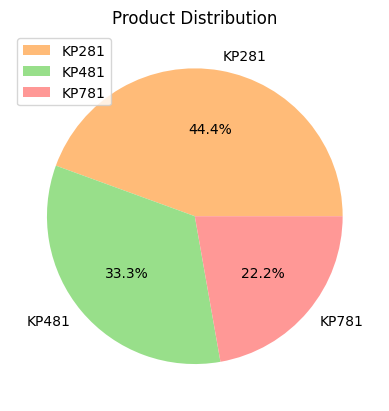

In [ ]:
product

plt.pie(product['Count'], labels = product['Product'],autopct='%1.1f%%', colors= colors[1:4])
plt.legend()
plt.title('Product Distribution')
plt.show()

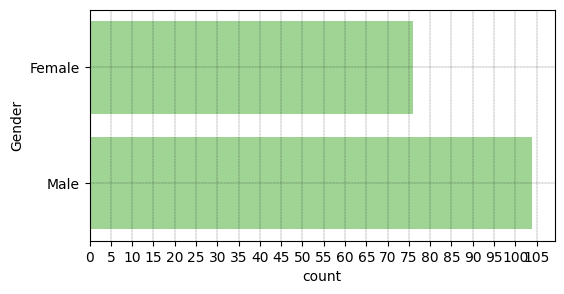

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(df['Gender'], color=colors[2])
plt.xticks(np.arange(0,110,5))
plt.grid(color='black', linestyle='--', linewidth=0.2)
plt.show()

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


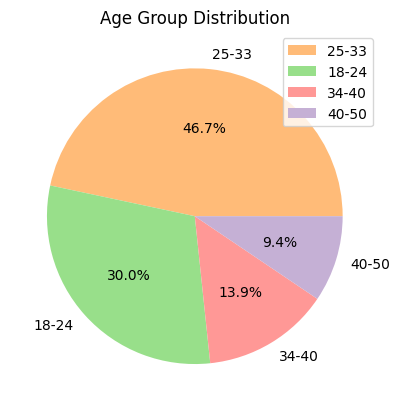

In [ ]:
ageGroup = df['AgeGroup'].value_counts().reset_index()
ageGroup.columns = ['AgeGroup', 'Count']

plt.pie(ageGroup['Count'], labels = ageGroup['AgeGroup'],autopct='%1.1f%%', colors= colors[1:5])
plt.legend()
plt.title('Age Group Distribution')
plt.show()

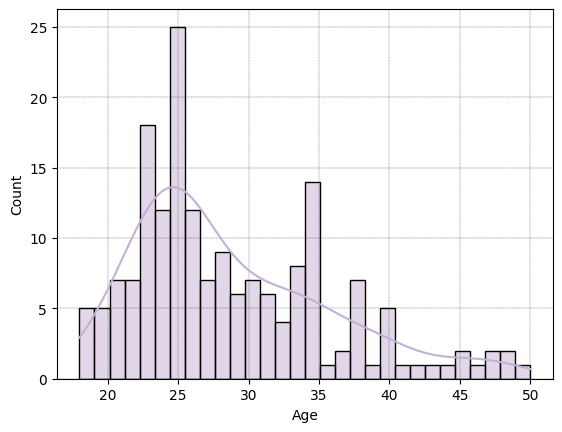

In [ ]:
age = df['Age']

sns.histplot(age, bins=30, kde=True, color=colors[4])
plt.grid(color='black', linestyle='--', linewidth=0.2)
plt.show()

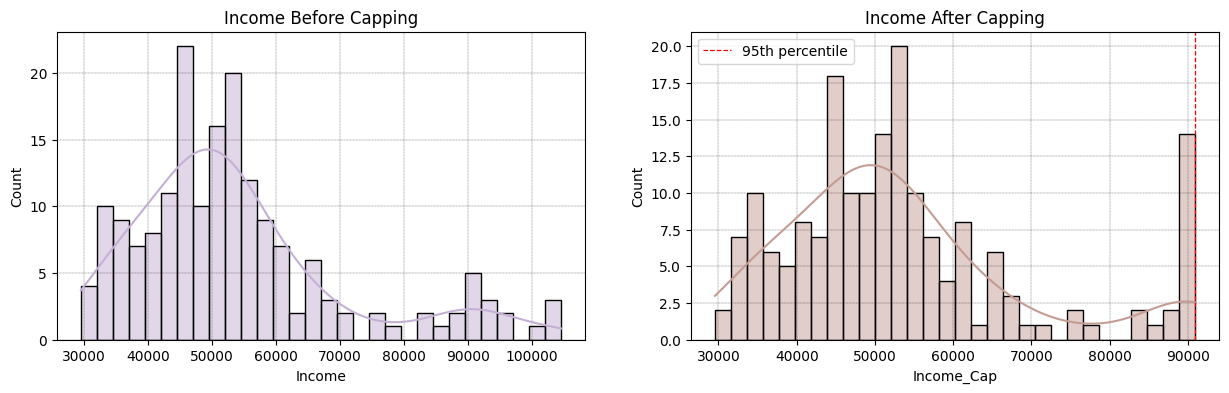

In [ ]:
income = df['Income']
incomeCap = df['Income_Cap']

plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
sns.histplot(income, bins=30, kde=True, color=colors[4])
plt.grid(color='black', linestyle='--', linewidth=0.2)
plt.title("Income Before Capping")

plt.subplot(1,2,2)
sns.histplot(incomeCap, bins=30, kde=True, color=colors[5])
plt.grid(color='black', linestyle='--', linewidth=0.2)
plt.title("Income After Capping")
income_cap_val = df['Income'].quantile(0.95)
plt.axvline(income_cap_val, color='red', linestyle='--',linewidth=0.9, label='95th percentile')
plt.legend()


plt.show()

### Distribution of Income (Before and After Capping)

The following plots compare the income distribution before and after applying 95th percentile capping:

- The original distribution (left) shows a long right tail with a few very high-income values.
- After capping (right), we preserve the overall pattern while limiting extreme values to improve clarity in plots and group comparisons.

The red dotted line indicates the 95th percentile threshold used for capping.


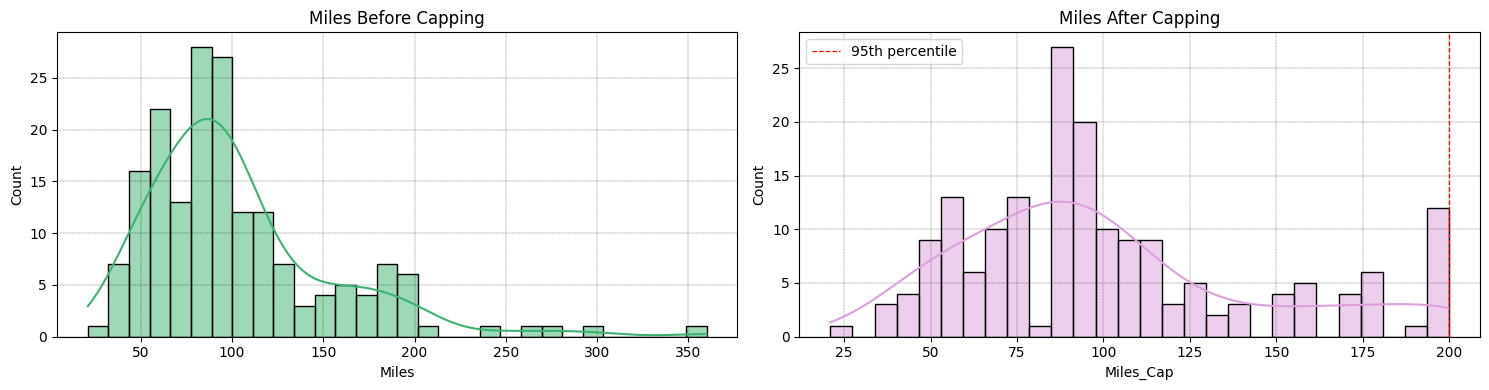

In [ ]:
miles = df['Miles']
milesCap = df['Miles_Cap']

plt.figure(figsize=(15, 4))

# Miles Before Capping
plt.subplot(1, 2, 1)
sns.histplot(miles, bins=30, kde=True, color=colors[6])
plt.grid(color='black', linestyle='--', linewidth=0.2)
plt.title("Miles Before Capping")

# Miles After Capping
plt.subplot(1, 2, 2)
sns.histplot(milesCap, bins=28, kde=True, color=colors[7])
plt.grid(color='black', linestyle='--', linewidth=0.2)
plt.title("Miles After Capping")
miles_cap_val = df['Miles'].quantile(0.95)
plt.axvline(miles_cap_val, color='red', linestyle='--', linewidth=0.9, label='95th percentile')
plt.legend()

plt.tight_layout()
plt.show()


### Distribution of Miles (Before and After Capping)

- The original distribution of miles walked/ran per week was right-skewed, with a few extremely high values.
- Capping at the 95th percentile helped smooth out the extreme outliers while keeping the overall trend intact.
- This ensures a more reliable interpretation of usage behavior across typical customers.
